# Dissertation
    
# **Notebook 6: Ascending NowCasting Preperation**
    
This notebook will read in and prepare metrics for creating scores. 

***

In [56]:
# Import packages

import pandas as pd
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns

In [57]:
# Look at working dir

print("The working directory is " + os.getcwd())

The working directory is /home/jovyan/work/OneDrive/UCL/Dissertation/Notebooks V3


In [58]:
shapefiles = os.path.join("Shapefiles")

profiles = os.path.join("LSOA Profiles")

clean = os.path.join("Cleaned data")

nc = os.path.join("Data", "Now-Casting")

In [59]:
def infodf(dataframe):
    print(f"There are "+str(len(dataframe)) + " rows in the dataframe")
    print(f"There are " + str(dataframe.shape[1]) + " columns in the data frame")
    print(f"The columns of the dataframe are: " + str(dataframe.columns))
    print(f"There are " + str(dataframe.isnull().sum().sum()) + " NaN values in the data frame")
    print(f"These NaN values are located in columns: " + str(dataframe.columns[dataframe.isnull().any()].tolist()))

# 1. Income

2.1 2014

In [60]:
income = pd.read_csv(os.path.join(nc, "income.csv"))

In [61]:
# Read in spatial data

msoa_2011 = gpd.read_file(os.path.join("shapefiles", "MSOA_2011.shp"))
lsoa_2011 = gpd.read_file(os.path.join("shapefiles", "LSOA_KENT_2011.shp"))

In [62]:
# Join 

income_kent = pd.merge(income, msoa_2011, on="MSOA11CD", how="right")

In [63]:
income_kent = income_kent[["MSOA11CD", "Income_2014", "Income_2018"]]

In [64]:
income_kent.dtypes

MSOA11CD        object
Income_2014    float64
Income_2018    float64
dtype: object

In [65]:
income_kent.to_csv(os.path.join(nc, "income_kent.csv"), index=False)

In [66]:
income_lsoa = pd.read_csv(os.path.join(nc, "income_kent_lsoa.csv"))

In [67]:
# Merge to just kent LSOAs

income_kent_lsoa = pd.merge(income_lsoa, lsoa_2011, on="LSOA11CD", how="right")

In [68]:
income_kent_lsoa_2014 = income_kent_lsoa.filter(regex="_2014|LSOA11CD")
income_kent_lsoa_2018 = income_kent_lsoa.filter(regex="_2018|LSOA11CD")

In [69]:
infodf(income_kent_lsoa)

There are 902 rows in the dataframe
There are 5 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'Income_2014', 'Income_2018', 'LSOA11NM', 'geometry'], dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


In [70]:
infodf(income_kent_lsoa_2014)

There are 902 rows in the dataframe
There are 2 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'Income_2014'], dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


In [71]:
infodf(income_kent_lsoa_2018)

There are 902 rows in the dataframe
There are 2 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'Income_2018'], dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


In [72]:
income = pd.merge(income_kent_lsoa_2018, income_kent_lsoa_2014, on="LSOA11CD", how="left")

# 2. House Prices

In [73]:
house_prices = pd.read_csv(os.path.join(nc, "Median_Prices_Quarterly.csv"))

In [74]:
house_prices

,Unnamed: 0,lsoa_cd,median_95Q1,median_95Q2,median_95Q3,median_95Q4,median_96Q1,median_96Q2,median_96Q3,median_96Q4,...,median_16Q3,median_16Q4,median_17Q1,median_17Q2,median_17Q3,median_17Q4,median_18Q1,median_18Q2,median_18Q3,median_18Q4
0,1,NaN,59000.0,62500.0,55000.0,60000.0,61495.0,50000.0,70500.0,71000.0,...,86415.0,50450.0,66435.0,25091.0,39997.5,108705.0,58000.0,72934.0,60000.0,75950.0
1,2,E01000001,99500.0,112475.0,123500.0,104671.0,129000.0,129750.0,152500.0,169375.0,...,880000.0,972500.0,1085000.0,872500.0,972500.0,2150000.0,900000.0,825000.0,695000.0,806000.0
2,3,E01000002,110000.0,135000.0,112500.0,132000.0,119275.0,112000.0,135000.0,117500.0,...,852500.0,937500.0,960000.0,970000.0,849950.0,776774.0,720000.0,617500.0,870000.0,997000.0
3,4,E01000003,75000.0,64200.0,66000.0,92000.0,90000.0,65000.0,73000.0,90000.0,...,795000.0,686250.0,751875.0,760000.0,830000.0,750000.0,702500.0,655250.0,730000.0,683500.0
4,5,E01000005,NaN,NaN,61000.0,NaN,55000.0,70000.0,NaN,55000.0,...,590000.0,2405000.0,712500.0,485000.0,2800000.0,375000.0,790000.0,20000.0,171849.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34751,34752,W01001954,71050.0,82500.0,105000.0,78500.0,90000.0,93500.0,104000.0,105000.0,...,360000.0,348500.0,475000.0,297475.0,350000.0,340000.0,284000.0,285000.0,429950.0,118000.0
34752,34753,W01001955,30000.0,NaN,250000.0,20000.0,33000.0,NaN,25000.0,NaN,...,96000.0,189500.0,125000.0,127000.0,120000.0,80000.0,802500.0,275000.0,130000.0,60000.0
34753,34754,W01001956,61225.0,65500.0,56875.0,57750.0,50000.0,49000.0,67000.0,59375.0,...,150000.0,168500.0,217500.0,156000.0,305995.0,291997.5,314995.0,163000.0,202497.5,183500.0
34754,34755,W01001957,60000.0,42000.0,33500.0,48000.0,38750.0,27500.0,45000.0,51500.0,...,170000.0,136122.5,133000.0,106500.0,130000.0,138000.0,116500.0,127000.0,152500.0,155000.0


In [75]:
house_prices = house_prices.rename(columns={"lsoa_cd":"LSOA11CD"})

In [76]:
house_prices = pd.merge(house_prices, lsoa_2011, on="LSOA11CD", how="right")

2.1 2014

In [77]:
# Filter to 2016 

house_prices_2014 = house_prices.filter(regex="median_14|LSOA11CD")

In [78]:
infodf(house_prices_2014)

There are 902 rows in the dataframe
There are 5 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'median_14Q1', 'median_14Q2', 'median_14Q3', 'median_14Q4'], dtype='object')
There are 24 NaN values in the data frame
These NaN values are located in columns: ['median_14Q1', 'median_14Q2', 'median_14Q3', 'median_14Q4']


In [79]:
# Look into nan values

nan = house_prices_2014[house_prices_2014.isnull().any(axis=1)]
nan
print("Looks like there are just nan values for a quater, not for a whole year. Will get median value to overcome this.")

Looks like there are just nan values for a quater, not for a whole year. Will get median value to overcome this.


In [80]:
house_prices_2014["Median_house_prices_2014"] = house_prices_2014[['median_14Q1', 'median_14Q2', 'median_14Q3', 'median_14Q4']].median(axis="columns")

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [81]:
nan = house_prices_2014[house_prices_2014.isnull().any(axis=1)]
nan

,LSOA11CD,median_14Q1,median_14Q2,median_14Q3,median_14Q4,Median_house_prices_2014
68,E01024047,NaN,180200.0,163750.0,NaN,171975.0
70,E01024049,NaN,179500.0,205000.0,203275.0,203275.0
111,E01024092,NaN,202250.0,225000.0,151500.0,202250.0
129,E01024110,NaN,182500.0,215000.0,304166.5,215000.0
183,E01024165,186500.0,NaN,154500.0,195000.0,186500.0
195,E01024177,132500.0,NaN,177000.0,225500.0,177000.0
206,E01024188,NaN,357000.0,294000.0,275000.0,294000.0
210,E01024192,162500.0,122000.0,147500.0,NaN,147500.0
214,E01024196,214750.0,143000.0,NaN,145000.0,145000.0
279,E01024264,NaN,159250.0,165000.0,225000.0,165000.0


In [82]:
house_prices_2014 = house_prices_2014[["LSOA11CD", "Median_house_prices_2014"]]

2.2 2018

In [83]:
house_prices_2018 = house_prices.filter(regex="median_18|LSOA11CD")

In [84]:
infodf(house_prices_2018)

There are 902 rows in the dataframe
There are 5 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'median_18Q1', 'median_18Q2', 'median_18Q3', 'median_18Q4'], dtype='object')
There are 23 NaN values in the data frame
These NaN values are located in columns: ['median_18Q1', 'median_18Q2', 'median_18Q3', 'median_18Q4']


In [85]:
house_prices_2018["Median_house_prices_2018"] = house_prices_2018[['median_18Q1', 'median_18Q2', 'median_18Q3', 'median_18Q4']].median(axis="columns")

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [86]:
house_prices_2018 = house_prices_2018[["LSOA11CD", "Median_house_prices_2018"]]

In [87]:
house_prices_2018

,LSOA11CD,Median_house_prices_2018
0,E01023972,232500.00
1,E01023973,203000.00
2,E01023974,210000.00
3,E01023975,224375.00
4,E01023976,232500.00
...,...,...
897,E01033211,148121.25
898,E01033212,154748.75
899,E01033213,192500.00
900,E01033214,345997.50


In [88]:
# Final df

house_prices = pd.merge(house_prices_2014, house_prices_2018, on="LSOA11CD", how="inner")

In [89]:
infodf(house_prices)

There are 902 rows in the dataframe
There are 3 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'Median_house_prices_2014', 'Median_house_prices_2018'], dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


# 3. POI

3.1 2014

In [90]:
# Read in 

poi_2014 = pd.read_csv(os.path.join(nc, "poi_2014_cleaned.csv"))

In [91]:
# Drop column

poi_2014 = poi_2014.drop("Unnamed: 0", axis=1)

In [92]:
# Strip suffix

poi_2014.columns = poi_2014.columns.str.rstrip('_2014')

# Make lowercase

poi_2014.columns = map(str.lower, poi_2014.columns)

3.2 2018

In [93]:
poi_2018 = pd.read_csv(os.path.join(nc, "poi_2018_cleaned.csv"))

In [94]:
# Drop column

poi_2018 = poi_2018.drop("Unnamed: 0", axis=1)

In [95]:
# Strip suffix

poi_2018.columns = poi_2018.columns.str.rstrip('_2018')

# Make lowercase

poi_2018.columns = map(str.lower, poi_2018.columns)

3.3 Create Higher Tertiary

In [96]:
# Filter

higher_tert = ["lsoa11cd","architectural_and_building_related_consultants",
"image_consultants",
"business_related_consultants",
"interpretation_and_translation_consultants",
"computer_consultants",
"security_consultants",
"construction_service_consultants",
"telecommunications_consultants",
"traffic_management_and_transport_related_consultants",
"food_consultants",
"aviation_engineers",
"instrumentation_engineers",
"chemical_engineers",
"marine_engineers_and_services",
"civil_engineers",
"mechanical_engineers",
"electrical_and_electronic_engineers",
"pneumatic_engineers",
"hydraulic_engineers",
"precision_engineers",
"industrial_engineers",
"structural_engineers",
"agricultural_contractors",
"advertising_services",
"internet_services",
"literary_services",
"computer_security",
"computer_systems_services",
"marketing_services",
"database_services",
"press_and_journalism_services",
"accountants_and_auditors",
"copyright_and_patent",
"stocks,_shares_and_unit_trusts",
"financial_advice_services",
"headquarters,_administration_and_central_offices"]

filt = ["Financial_Advice_Services"]

In [97]:
# Apply filter

poi_2014_higher_tert = poi_2014.filter(items=higher_tert)
poi_2018_higher_tert = poi_2018.filter(items=higher_tert)

In [98]:
# Check 

if len(higher_tert) == len(poi_2014_higher_tert.columns):
    print("All POI categories are there")
else:
    x = len(higher_tert) - len(poi_2014_higher_tert.columns) 
    print("There are " + str(x) + " POI categories missing for 2014")

    
if len(higher_tert) == len(poi_2018_higher_tert.columns):
    print("All POI categories are there")
else:
    x = len(higher_tert) - len(poi_2018_higher_tert.columns) 
    print("There are " + str(x) + " POI categories missing for 2018")


There are 1 POI categories missing for 2014
There are 2 POI categories missing for 2018


In [99]:
# Look at 2014 first

collist = poi_2014_higher_tert.columns.to_list()

# Convert lists to sets
first_set = set(collist)
sec_set = set(higher_tert)
# Get the differences between two sets
differences = (first_set - sec_set).union(sec_set - first_set)
print('Differences between two lists: ')
print(differences)

Differences between two lists: 
{'computer_security'}


In [100]:
# Look at 2018

collist = poi_2018_higher_tert.columns.to_list()

# Convert lists to sets
first_set = set(collist)
sec_set = set(higher_tert)
# Get the differences between two sets
differences = (first_set - sec_set).union(sec_set - first_set)
print('Differences between two lists: ')
print(differences)

Differences between two lists: 
{'chemical_engineers', 'pneumatic_engineers'}


In [101]:
# Make spatial 

poi_2014_higher_tert_gdf = pd.merge(lsoa_2011, poi_2014_higher_tert, how="right", right_on="lsoa11cd", left_on="LSOA11CD")
poi_2014_higher_tert_gdf = gpd.GeoDataFrame(poi_2014_higher_tert_gdf, geometry = "geometry", crs=lsoa_2011.crs.to_string())

poi_2018_higher_tert_gdf = pd.merge(lsoa_2011, poi_2018_higher_tert, how="right", right_on="lsoa11cd", left_on="LSOA11CD")
poi_2018_higher_tert_gdf = gpd.GeoDataFrame(poi_2018_higher_tert_gdf, geometry = "geometry", crs=lsoa_2011.crs.to_string())

In [102]:
# Check difference between columns

collist = poi_2014_higher_tert_gdf.columns.to_list()
collist2 = poi_2018_higher_tert_gdf.columns.to_list()

# Convert lists to sets
first_set = set(collist)
sec_set = set(collist2)
# Get the differences between two sets
differences = (first_set - sec_set).union(sec_set - first_set)
print('Differences between two lists: ')
print(differences)

Differences between two lists: 
{'computer_security', 'chemical_engineers', 'pneumatic_engineers'}


These must just have no counts for those years.

In [103]:
# Remove missing rows 

poi_2014_higher_tert_gdf = poi_2014_higher_tert_gdf.drop(['chemical_engineers', "pneumatic_engineers"], axis=1)
poi_2018_higher_tert_gdf = poi_2018_higher_tert_gdf.drop(['computer_security'], axis=1)

In [104]:
# Check difference between rows

collist = poi_2014_higher_tert_gdf["LSOA11CD"].to_list()
collist2 = poi_2018_higher_tert_gdf["LSOA11CD"].to_list()

# Convert lists to sets
first_set = set(collist)
sec_set = set(collist2)
# Get the differences between two sets
differences = (first_set - sec_set).union(sec_set - first_set)
print('Differences between two lists: ')
print(differences)

Differences between two lists: 
set()


In [105]:
# After looking on QGIS missing LSOA is just a clipping error

#missing_lsoa = poi_2018_higher_tert_gdf[poi_2018_higher_tert_gdf["LSOA11CD"] == 'E01000748']
poi_2018_higher_tert_gdf = poi_2018_higher_tert_gdf.set_index("LSOA11CD")
#poi_2018_higher_tert_gdf = poi_2018_higher_tert_gdf.drop(["E01000748"])
poi_2018_higher_tert_gdf = poi_2018_higher_tert_gdf.reset_index()


In [106]:
# Check difference between rows again

collist = poi_2014_higher_tert_gdf["LSOA11CD"].to_list()
collist2 = poi_2018_higher_tert_gdf["LSOA11CD"].to_list()

# Convert lists to sets
first_set = set(collist)
sec_set = set(collist2)
# Get the differences between two sets
differences = (first_set - sec_set).union(sec_set - first_set)
print('Differences between two lists: ')
print(differences)

Differences between two lists: 
set()


In [107]:
# Calculate count of higher tertiary 

poi_2014_higher_tert_gdf["count"] = poi_2014_higher_tert_gdf.iloc[:, 1:].sum(axis = 1)


poi_2018_higher_tert_gdf["count"] = poi_2018_higher_tert_gdf.iloc[:, 1:].sum(axis = 1)


/tmp/ipykernel_2202/4095699642.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  poi_2014_higher_tert_gdf["count"] = poi_2014_higher_tert_gdf.iloc[:, 1:].sum(axis = 1)
/tmp/ipykernel_2202/4095699642.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  poi_2018_higher_tert_gdf["count"] = poi_2018_higher_tert_gdf.iloc[:, 1:].sum(axis = 1)


In [108]:
outline = gpd.read_file(os.path.join(shapefiles, "KENT_OUTLINE.shp"))

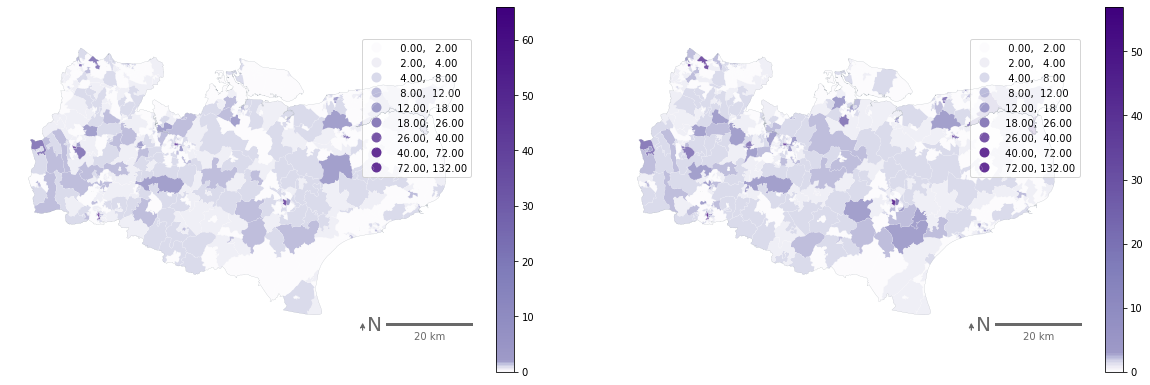

In [109]:
import matplotlib.colors as mcolors

# Set axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_aspect('equal')
ax1.axis('off')

ax2.set_aspect('equal')
ax2.axis('off')

# Plot outlines of LSOA'S 
lsoa_2011.plot(ax=ax1, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)
lsoa_2011.plot(ax=ax2, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax1, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)
outline.plot(ax=ax2, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2011.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax1.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 
ax2.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax1.text(x=620000, y=113000,s='N', fontsize=20, color="dimgray")
ax2.text(x=620000, y=113000,s='N', fontsize=20, color="dimgray")

ax1.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")
ax2.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

# Plot Score
#poi_2014_gdf.plot(ax=ax1, column=poi_2014_gdf["count_poi_2014"], zorder=3, cmap="Purples", legend=True, scheme="user_Defined", alpha=0.8, classification_kwds=dict(bins=[38,65,104,157,214,272,355,471,651,906]))
poi_2014_higher_tert_gdf.plot(ax=ax1, column=poi_2014_higher_tert_gdf["count"], zorder=3, cmap="Purples", legend=True, scheme="user_Defined", alpha=0.8, classification_kwds=dict(bins=[2, 4, 8, 12, 18, 26, 40, 72, 132]))

# Plot score
poi_2018_higher_tert_gdf.plot(ax=ax2, column=poi_2018_higher_tert_gdf["count"], zorder=3, cmap="Purples", legend=True, scheme="user_Defined", alpha=0.8, classification_kwds=dict(bins=[2, 4, 8, 12, 18, 26, 40, 72, 132]))

# normalize color
vmin, vmax, vcenter = poi_2014_higher_tert_gdf["count"].min(), poi_2014_higher_tert_gdf["count"].max(), poi_2014_higher_tert_gdf["count"].median()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'Purples'
cbar1 = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# normalize color
vmin, vmax, vcenter = poi_2018_higher_tert_gdf["count"].min(), poi_2018_higher_tert_gdf["count"].max(), poi_2018_higher_tert_gdf["count"].median()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'Purples'
cbar2 = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig.colorbar(cbar2, ax=ax2, fraction=0.036, pad=0.04)
fig.colorbar(cbar1, ax=ax1, fraction=0.036, pad=0.04)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_count_poi_2014_2018.png'), transparent=True, dpi=300)

# Show map
plt.show()

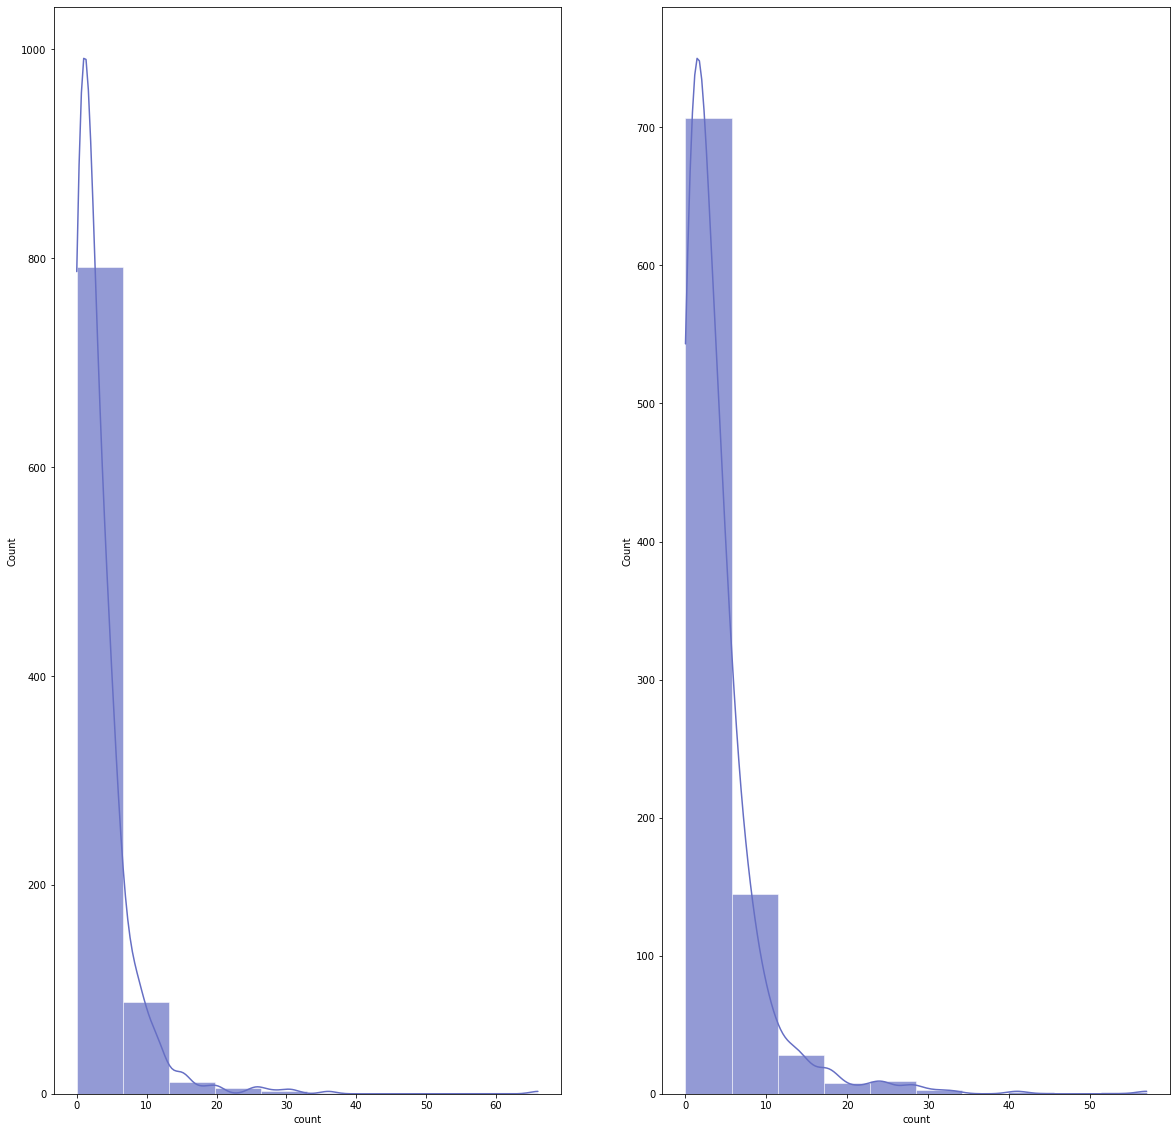

In [110]:
# Plot 

# Set axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

sns.set(style="whitegrid")

sns.histplot(ax=ax1, data=poi_2014_higher_tert_gdf, x="Change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=10)
sns.histplot(ax=ax2, data=poi_2018_higher_tert_gdf, x="Change", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=10)

#plt.axvline(x=37.98, color='gray', linestyle='dashed', linewidth=10)

plt.show()

3.4 Calculate Change

In [111]:
# Sort

poi_2014_higher_tert_gdf = poi_2014_higher_tert_gdf.reindex(sorted(poi_2014_higher_tert_gdf.columns), axis=1)
poi_2018_higher_tert_gdf = poi_2018_higher_tert_gdf.reindex(sorted(poi_2018_higher_tert_gdf.columns), axis=1)

In [112]:
# Check order is the same https://stackoverflow.com/questions/14224172/equality-in-pandas-dataframes-column-order-matters

collist = poi_2014_higher_tert_gdf.columns.to_list()
collist2 = poi_2018_higher_tert_gdf.columns.to_list()

collist==collist2

True

In [113]:
# Calculate percent of all POIs

poi_2014_higher_tert_gdf["prop_2014"] = poi_2014_higher_tert_gdf["count"]/poi_2014["count_poi"]
poi_2018_higher_tert_gdf["prop_2018"] = poi_2018_higher_tert_gdf["count"]/poi_2018["count_poi"]



In [114]:
# Tidy

poi_2014_higher_tert_filt = poi_2014_higher_tert_gdf[["LSOA11CD", "prop_2014"]]
poi_2018_higher_tert_filt = poi_2018_higher_tert_gdf[["LSOA11CD", "prop_2018"]]

In [115]:
# Merge

higher_tertiary = pd.merge(poi_2014_higher_tert_filt, poi_2018_higher_tert_filt, on="LSOA11CD", how="inner")

# 4. Final Variables

The dataframes are:

1. income
2. house_prices
3. higher_tertiary

In [116]:
infodf(higher_tertiary)

There are 902 rows in the dataframe
There are 3 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'prop_2014', 'prop_2018'], dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


In [117]:
# Merge

df = pd.merge(income, house_prices, on="LSOA11CD", how="right")
df = pd.merge(df, higher_tertiary, on="LSOA11CD", how="right")

In [118]:
infodf(df)

There are 902 rows in the dataframe
There are 7 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'Income_2018', 'Income_2014', 'Median_house_prices_2014',
       'Median_house_prices_2018', 'prop_2014', 'prop_2018'],
      dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


In [119]:
# Save

df.to_csv(os.path.join("Cleaned data", "nc_ranking_vars.csv"))
